## Figure 8. Comparing RDD for different network depths

Imports

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

#%matplotlib inline

import matplotlib
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import numpy.random as rand
import pandas as pd
import seaborn as sns

from lib.lif import LIF_Recurrent, ParamsLIF_Recurrent
from lib.causal import causaleffect_maxv, causaleffect_maxv_linear, causaleffect_maxv_sp

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Angle between two vectors
def alignment(a,b):
    da = np.dot(a,a)
    db = np.dot(b,b)
    if da > 0 and db > 0:
        return 180/np.pi*np.arccos(np.dot(a,b)/np.sqrt(da*db))
    else:
        return 360.
    
def mse(pred,true):
    return np.mean((pred - true)**2)

In [3]:
#Test LIF_Recurrent network
nsims = 1

cvals = [0.0, 0.7]
pvals = np.logspace(-2, 0, 10)
#c = 0.9
n1 = 200
n2 = 10
tau_s = 0.020
dt = 0.001
t = 1   #In seconds
sigma = 10
x = 0
#p = 0.1
DeltaT = 10

nC = len(cvals)
nP = len(pvals)

t_filter = np.linspace(0, 1, 1000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]

params = ParamsLIF_Recurrent(exp_filter, sigma = sigma,sigma1=0.1, n1 = n1, n2 = n2)
lif = LIF_Recurrent(params, t = t)

In [4]:
params

## Test 2 hidden layer network

In [5]:
inp,v, h, u, sh,st_actv,st_err,st_x,st_y = lif.simulate()
#bp,hidd=lif.backprop()
# results=lif.simulate()
#np.nonzero(results[3][0,:])[0].shape

(784, 1000)
('y_hat:', array([ 0.03150231,  0.02927393,  0.01390515,  0.03378289,  0.02833339,
        0.03851294,  0.03346971,  0.03966187,  0.05292776,  0.02497192]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 0.1058432 ,  0.1646794 ,  0.05679458,  0.11794384,  0.08398755,
        0.1240161 ,  0.12684474,  0.12360384,  0.16913458,  0.08425932]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 0.21768541,  0.31959784,  0.1066789 ,  0.21309094,  0.14795381,
        0.22658463,  0.23613702,  0.22512389,  0.30313611,  0.15829373]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 0.37246092,  0.49500751,  0.15680296,  0.31552635,  0.21653984,
        0.3494856 ,  0.36453447,  0.34240511,  0.45438694,  0.24519409]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 0.57076899,  0.70118684,  0.20642858,  0.42116083,  0.28861596,
        0.49850669,  0.51851232,  0.48276216,  0.

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 31.21131268,  31.59160692,  28.18007387,  29.47264784,
        28.38402428,  30.68945776,  30.83361822,  29.80131589,
        31.25683967,  29.74646904]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 32.19182851,  32.57212275,  29.1605897 ,  30.45316366,
        29.36454011,  31.66997359,  31.81413405,  30.78183172,
        32.2373555 ,  30.72698487]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 33.17234434,  33.55263858,  30.14110553,  31.43367949,
        30.34505594,  32.65048942,  32.79464988,  31.76234755,
        33.21787133,  31.7075007 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 34.15286017,  34.53315441,  31.12162136,  32.41419532,
        31.32557177,  33.63100525,  33.77516571,  32.74286338,
        34.19838716,  32.68801653]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 35.133376  ,  35.51367

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 66.50988254,  66.89017678,  63.47864373,  64.77121769,
        63.68259413,  65.98802761,  66.13218808,  65.09988575,
        66.55540953,  65.04503889]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 67.49039837,  67.8706926 ,  64.45915956,  65.75173352,
        64.66310996,  66.96854344,  67.11270391,  66.08040158,
        67.53592536,  66.02555472]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 68.4709142 ,  68.85120843,  65.43967539,  66.73224935,
        65.64362579,  67.94905927,  68.09321974,  67.06091741,
        68.51644119,  67.00607055]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 69.45143002,  69.83172426,  66.42019122,  67.71276518,
        66.62414162,  68.9295751 ,  69.07373557,  68.04143323,
        69.49695701,  67.98658638]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 70.43194585,  70.81224

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 101.80845239,  102.18874663,   98.77721359,  100.06978755,
         98.98116399,  101.28659747,  101.43075794,  100.3984556 ,
        101.85397938,  100.34360875]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 102.78896822,  103.16926246,   99.75772941,  101.05030338,
         99.96167982,  102.2671133 ,  102.41127377,  101.37897143,
        102.83449521,  101.32412458]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 103.76948405,  104.14977829,  100.73824524,  102.03081921,
        100.94219565,  103.24762913,  103.39178959,  102.35948726,
        103.81501104,  102.30464041]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 104.74999988,  105.13029412,  101.71876107,  103.01133504,
        101.92271148,  104.22814496,  104.37230542,  103.34000309,
        104.79552687,  103.28515624]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 135.14599059,  135.52628483,  132.11475178,  133.40732574,
        132.31870219,  134.62413567,  134.76829613,  133.7359938 ,
        135.19151758,  133.68114695]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 136.12650642,  136.50680066,  133.09526761,  134.38784157,
        133.29921802,  135.6046515 ,  135.74881196,  134.71650963,
        136.17203341,  134.66166278]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 137.10702225,  137.48731649,  134.07578344,  135.3683574 ,
        134.27973385,  136.58516733,  136.72932779,  135.69702546,
        137.15254924,  135.64217861]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 138.08753808,  138.46783232,  135.05629927,  136.34887323,
        135.26024968,  137.56568315,  137.70984362,  136.67754129,
        138.13306507,  136.62269444]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 168.48352879,  168.86382303,  165.45228998,  166.74486394,
        165.65624039,  167.96167386,  168.10583433,  167.073532  ,
        168.52905578,  167.01868514]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 169.46404462,  169.84433886,  166.43280581,  167.72537977,
        166.63675622,  168.94218969,  169.08635016,  168.05404783,
        169.50957161,  167.99920097]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 170.44456045,  170.82485468,  167.41332164,  168.7058956 ,
        167.61727204,  169.92270552,  170.06686599,  169.03456366,
        170.49008744,  168.9797168 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 171.42507628,  171.80537051,  168.39383747,  169.68641143,
        168.59778787,  170.90322135,  171.04738182,  170.01507949,
        171.47060327,  169.96023263]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

lib/lif.py:780: RuntimeWarning: invalid value encountered in multiply
  delta1 = np.multiply(np.dot(delta.T,self.U[self.params.n1:,0:self.params.n1]),padded2)
lib/lif.py:706: RuntimeWarning: invalid value encountered in greater
  s = vt>self.params.mu
lib/lif.py:720: RuntimeWarning: invalid value encountered in less
  ut[ut<self.params.reset] = self.params.reset
lib/lif.py:719: RuntimeWarning: invalid value encountered in less
  vt[vt<self.params.reset] = self.params.reset


(784, 1000)
('y_hat:', array([ 188.09384537,  188.47413961,  185.06260657,  186.35518053,
        185.26655697,  187.57199045,  187.71615092,  186.68384858,
        188.13937236,  186.62900173]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 189.0743612 ,  189.45465544,  186.0431224 ,  187.33569636,
        186.2470728 ,  188.55250628,  188.69666675,  187.66436441,
        189.11988819,  187.60951756]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 190.05487703,  190.43517127,  187.02363823,  188.31621219,
        187.22758863,  189.53302211,  189.67718258,  188.64488024,
        190.10040402,  188.59003339]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 191.03539286,  191.4156871 ,  188.00415406,  189.29672802,
        188.20810446,  190.51353794,  190.65769841,  189.62539607,
        191.08091985,  189.57054922]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 192.0

(784, 1000)
('y_hat:', array([ 221.43138357,  221.81167781,  218.40014476,  219.69271873,
        218.60409517,  220.90952865,  221.05368912,  220.02138678,
        221.47691056,  219.96653993]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 222.4118994 ,  222.79219364,  219.38066059,  220.67323456,
        219.584611  ,  221.89004448,  222.03420494,  221.00190261,
        222.45742639,  220.94705576]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 223.39241523,  223.77270947,  220.36117642,  221.65375039,
        220.56512683,  222.87056031,  223.01472077,  221.98241844,
        223.43794222,  221.92757159]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 224.37293106,  224.7532253 ,  221.34169225,  222.63426621,
        221.54564266,  223.85107614,  223.9952366 ,  222.96293427,
        224.41845805,  222.90808742]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 225.3

(784, 1000)
('y_hat:', array([ 254.76892177,  255.14921601,  251.73768296,  253.03025692,
        251.94163337,  254.24706685,  254.39122731,  253.35892498,
        254.81444876,  253.30407813]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 255.7494376 ,  256.12973184,  252.71819879,  254.01077275,
        252.9221492 ,  255.22758268,  255.37174314,  254.33944081,
        255.79496459,  254.28459396]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 256.72995343,  257.11024767,  253.69871462,  254.99128858,
        253.90266503,  256.2080985 ,  256.35225897,  255.31995664,
        256.77548042,  255.26510978]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 257.71046926,  258.0907635 ,  254.67923045,  255.97180441,
        254.88318086,  257.18861433,  257.3327748 ,  256.30047247,
        257.75599625,  256.24562561]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 258.6

lib/lif.py:52: RuntimeWarning: overflow encountered in exp
  second = np.exp(-u**2+ 2*y_r*u)#,dtype=np.float128)


('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 268.49614338,  268.87643762,  265.46490457,  266.75747853,
        265.66885498,  267.97428846,  268.11844892,  267.08614659,
        268.54167037,  267.03129974]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 269.47665921,  269.85695345,  266.4454204 ,  267.73799436,
        266.64937081,  268.95480429,  269.09896475,  268.06666242,
        269.5221862 ,  268.01181557]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 270.45717504,  270.83746928,  267.42593623,  268.71851019,
        267.62988664,  269.93532012,  270.07948058,  269.04717825,
        270.50270203,  268.9923314 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 271.43769087,  271.81798511,  268.40645206,  269.69902602,
        268.61040247,  270.91583594,  271.05999641,  270.02769408,
        271.48321786,  269.97284722]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

/opt/anaconda/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2652: RuntimeWarning: invalid value encountered in integrate (vectorized)
  outputs = ufunc(*inputs)


('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 286.14542831,  286.52572255,  283.1141895 ,  284.40676346,
        283.31813991,  285.62357338,  285.76773385,  284.73543152,
        286.1909553 ,  284.68058466]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 287.12594414,  287.50623838,  284.09470533,  285.38727929,
        284.29865574,  286.60408921,  286.74824968,  285.71594735,
        287.17147113,  285.66110049]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 288.10645997,  288.48675421,  285.07522116,  286.36779512,
        285.27917156,  287.58460504,  287.72876551,  286.69646318,
        288.15198696,  286.64161632]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 289.0869758 ,  289.46727003,  286.05573699,  287.34831095,
        286.25968739,  288.56512087,  288.70928134,  287.67697901,
        289.13250279,  287.62213215]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 319.48296651,  319.86326074,  316.4517277 ,  317.74430166,
        316.6556781 ,  318.96111158,  319.10527205,  318.07296972,
        319.5284935 ,  318.01812286]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 320.46348234,  320.84377657,  317.43224353,  318.72481749,
        317.63619393,  319.94162741,  320.08578788,  319.05348554,
        320.50900932,  318.99863869]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 321.44399816,  321.8242924 ,  318.41275936,  319.70533332,
        318.61670976,  320.92214324,  321.06630371,  320.03400137,
        321.48952515,  319.97915452]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 322.42451399,  322.80480823,  319.39327519,  320.68584915,
        319.59722559,  321.90265907,  322.04681954,  321.0145172 ,
        322.47004098,  320.95967035]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 352.8205047 ,  353.20079894,  349.7892659 ,  351.08183986,
        349.9932163 ,  352.29864978,  352.44281025,  351.41050791,
        352.86603169,  351.35566106]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 353.80102053,  354.18131477,  350.76978173,  352.06235569,
        350.97373213,  353.27916561,  353.42332608,  352.39102374,
        353.84654752,  352.33617689]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 354.78153636,  355.1618306 ,  351.75029755,  353.04287152,
        351.95424796,  354.25968144,  354.40384191,  353.37153957,
        354.82706335,  353.31669272]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 355.76205219,  356.14234643,  352.73081338,  354.02338735,
        352.93476379,  355.24019727,  355.38435773,  354.3520554 ,
        355.80757918,  354.29720855]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 386.1580429 ,  386.53833714,  383.12680409,  384.41937805,
        383.3307545 ,  385.63618798,  385.78034844,  384.74804611,
        386.20356989,  384.69319926]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 387.13855873,  387.51885297,  384.10731992,  385.39989388,
        384.31127033,  386.61670381,  386.76086427,  385.72856194,
        387.18408572,  385.67371509]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 388.11907456,  388.4993688 ,  385.08783575,  386.38040971,
        385.29178616,  387.59721964,  387.7413801 ,  386.70907777,
        388.16460155,  386.65423092]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 389.09959039,  389.47988463,  386.06835158,  387.36092554,
        386.27230199,  388.57773547,  388.72189593,  387.6895936 ,
        389.14511738,  387.63474675]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 419.4955811 ,  419.87587534,  416.46434229,  417.75691625,
        416.6682927 ,  418.97372617,  419.11788664,  418.08558431,
        419.54110809,  418.03073745]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 420.47609693,  420.85639117,  417.44485812,  418.73743208,
        417.64880853,  419.954242  ,  420.09840247,  419.06610014,
        420.52162392,  419.01125328]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 421.45661276,  421.836907  ,  418.42537395,  419.71794791,
        418.62932435,  420.93475783,  421.0789183 ,  420.04661597,
        421.50213975,  419.99176911]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 422.43712859,  422.81742282,  419.40588978,  420.69846374,
        419.60984018,  421.91527366,  422.05943413,  421.0271318 ,
        422.48265558,  420.97228494]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 452.8331193 ,  453.21341353,  449.80188049,  451.09445445,
        450.00583089,  452.31126437,  452.45542484,  451.42312251,
        452.87864628,  451.36827565]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 453.81363512,  454.19392936,  450.78239632,  452.07497028,
        450.98634672,  453.2917802 ,  453.43594067,  452.40363833,
        453.85916211,  452.34879148]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 454.79415095,  455.17444519,  451.76291215,  453.05548611,
        451.96686255,  454.27229603,  454.4164565 ,  453.38415416,
        454.83967794,  453.32930731]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 455.77466678,  456.15496102,  452.74342798,  454.03600194,
        452.94737838,  455.25281186,  455.39697233,  454.36466999,
        455.82019377,  454.30982314]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 486.17065749,  486.55095173,  483.13941869,  484.43199265,
        483.34336909,  485.64880257,  485.79296304,  484.7606607 ,
        486.21618448,  484.70581385]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 487.15117332,  487.53146756,  484.11993451,  485.41250848,
        484.32388492,  486.6293184 ,  486.77347887,  485.74117653,
        487.19670031,  485.68632968]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 488.13168915,  488.51198339,  485.10045034,  486.39302431,
        485.30440075,  487.60983423,  487.75399469,  486.72169236,
        488.17721614,  486.66684551]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 489.11220498,  489.49249922,  486.08096617,  487.37354014,
        486.28491658,  488.59035006,  488.73451052,  487.70220819,
        489.15773197,  487.64736134]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 519.50819569,  519.88848993,  516.47695688,  517.76953084,
        516.68090729,  518.98634077,  519.13050123,  518.0981989 ,
        519.55372268,  518.04335205]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 520.48871152,  520.86900576,  517.45747271,  518.75004667,
        517.66142312,  519.9668566 ,  520.11101706,  519.07871473,
        520.53423851,  519.02386788]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 521.46922735,  521.84952159,  518.43798854,  519.7305625 ,
        518.64193895,  520.94737243,  521.09153289,  520.05923056,
        521.51475434,  520.00438371]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 522.44974318,  522.83003742,  519.41850437,  520.71107833,
        519.62245478,  521.92788825,  522.07204872,  521.03974639,
        522.49527017,  520.98489953]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 552.84573389,  553.22602813,  549.81449508,  551.10706904,
        550.01844549,  552.32387896,  552.46803943,  551.4357371 ,
        552.89126088,  551.38089024]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 553.82624972,  554.20654396,  550.79501091,  552.08758487,
        550.99896131,  553.30439479,  553.44855526,  552.41625293,
        553.87177671,  552.36140607]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 554.80676555,  555.18705978,  551.77552674,  553.0681007 ,
        551.97947714,  554.28491062,  554.42907109,  553.39676876,
        554.85229254,  553.3419219 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 555.78728138,  556.16757561,  552.75604257,  554.04861653,
        552.95999297,  555.26542645,  555.40958692,  554.37728459,
        555.83280837,  554.32243773]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

lib/lif.py:55: RuntimeWarning: overflow encountered in double_scalars
  integral = 1/gl*1/u*(first-second)


('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 561.67037635,  562.05067059,  558.63913754,  559.93171151,
        558.84308795,  561.14852143,  561.29268189,  560.26037956,
        561.71590334,  560.20553271]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 562.65089218,  563.03118642,  559.61965337,  560.91222734,
        559.82360378,  562.12903726,  562.27319772,  561.24089539,
        562.69641917,  561.18604854]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 563.63140801,  564.01170225,  560.6001692 ,  561.89274316,
        560.80411961,  563.10955309,  563.25371355,  562.22141122,
        563.676935  ,  562.16656437]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 564.61192384,  564.99221808,  561.58068503,  562.87325899,
        561.78463544,  564.09006892,  564.23422938,  563.20192705,
        564.65745083,  563.1470802 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 595.00791455,  595.38820879,  591.97667574,  593.2692497 ,
        592.18062615,  594.48605963,  594.63022009,  593.59791776,
        595.05344154,  593.54307091]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 595.98843038,  596.36872462,  592.95719157,  594.24976553,
        593.16114198,  595.46657545,  595.61073592,  594.57843359,
        596.03395737,  594.52358674]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 596.96894621,  597.34924045,  593.9377074 ,  595.23028136,
        594.14165781,  596.44709128,  596.59125175,  595.55894942,
        597.0144732 ,  595.50410256]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 597.94946204,  598.32975628,  594.91822323,  596.21079719,
        595.12217364,  597.42760711,  597.57176758,  596.53946525,
        597.99498903,  596.48461839]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 628.34545275,  628.72574699,  625.31421394,  626.6067879 ,
        625.51816434,  627.82359782,  627.96775829,  626.93545596,
        628.39097974,  626.8806091 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 629.32596858,  629.70626281,  626.29472977,  627.58730373,
        626.49868017,  628.80411365,  628.94827412,  627.91597179,
        629.37149557,  627.86112493]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 630.30648441,  630.68677864,  627.2752456 ,  628.56781956,
        627.479196  ,  629.78462948,  629.92878995,  628.89648762,
        630.35201139,  628.84164076]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 631.28700023,  631.66729447,  628.25576143,  629.54833539,
        628.45971183,  630.76514531,  630.90930578,  629.87700344,
        631.33252722,  629.82215659]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 661.68299094,  662.06328518,  658.65175214,  659.9443261 ,
        658.85570254,  661.16113602,  661.30529649,  660.27299415,
        661.72851793,  660.2181473 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 662.66350677,  663.04380101,  659.63226797,  660.92484193,
        659.83621837,  662.14165185,  662.28581232,  661.25350998,
        662.70903376,  661.19866313]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 663.6440226 ,  664.02431684,  660.6127838 ,  661.90535776,
        660.8167342 ,  663.12216768,  663.26632815,  662.23402581,
        663.68954959,  662.17917896]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 664.62453843,  665.00483267,  661.59329962,  662.88587359,
        661.79725003,  664.10268351,  664.24684398,  663.21454164,
        664.67006542,  663.15969479]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 695.02052914,  695.40082338,  691.98929033,  693.2818643 ,
        692.19324074,  694.49867422,  694.64283468,  693.61053235,
        695.06605613,  693.5556855 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 696.00104497,  696.38133921,  692.96980616,  694.26238013,
        693.17375657,  695.47919005,  695.62335051,  694.59104818,
        696.04657196,  694.53620133]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 696.9815608 ,  697.36185504,  693.95032199,  695.24289595,
        694.1542724 ,  696.45970588,  696.60386634,  695.57156401,
        697.02708779,  695.51671716]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 697.96207663,  698.34237087,  694.93083782,  696.22341178,
        695.13478823,  697.44022171,  697.58438217,  696.55207984,
        698.00760362,  696.49723299]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 728.35806734,  728.73836158,  725.32682853,  726.61940249,
        725.53077894,  727.83621242,  727.98037288,  726.94807055,
        728.40359433,  726.8932237 ]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 729.33858317,  729.71887741,  726.30734436,  727.59991832,
        726.51129477,  728.81672824,  728.96088871,  727.92858638,
        729.38411016,  727.87373952]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 730.319099  ,  730.69939324,  727.28786019,  728.58043415,
        727.4918106 ,  729.79724407,  729.94140454,  728.90910221,
        730.36462599,  728.85425535]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 731.29961483,  731.67990907,  728.26837602,  729.56094998,
        728.47232642,  730.7777599 ,  730.92192037,  729.88961804,
        731.34514182,  729.83477118]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 761.69560554,  762.07589977,  758.66436673,  759.95694069,
        758.86831713,  761.17375061,  761.31791108,  760.28560875,
        761.74113253,  760.23076189]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 762.67612137,  763.0564156 ,  759.64488256,  760.93745652,
        759.84883296,  762.15426644,  762.29842691,  761.26612458,
        762.72164836,  761.21127772]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 763.6566372 ,  764.03693143,  760.62539839,  761.91797235,
        760.82934879,  763.13478227,  763.27894274,  762.24664041,
        763.70216418,  762.19179355]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 764.63715302,  765.01744726,  761.60591422,  762.89848818,
        761.80986462,  764.1152981 ,  764.25945857,  763.22715623,
        764.68268001,  763.17230938]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 795.03314373,  795.41343797,  792.00190493,  793.29447889,
        792.20585533,  794.51128881,  794.65544928,  793.62314694,
        795.07867072,  793.56830009]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 796.01365956,  796.3939538 ,  792.98242076,  794.27499472,
        793.18637116,  795.49180464,  795.63596511,  794.60366277,
        796.05918655,  794.54881592]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 796.99417539,  797.37446963,  793.96293659,  795.25551055,
        794.16688699,  796.47232047,  796.61648094,  795.5841786 ,
        797.03970238,  795.52933175]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 797.97469122,  798.35498546,  794.94345241,  796.23602638,
        795.14740282,  797.4528363 ,  797.59699677,  796.56469443,
        798.02021821,  796.50984758]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 828.37068193,  828.75097617,  825.33944312,  826.63201709,
        825.54339353,  827.84882701,  827.99298747,  826.96068514,
        828.41620892,  826.90583829]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 829.35119776,  829.731492  ,  826.31995895,  827.61253291,
        826.52390936,  828.82934284,  828.9735033 ,  827.94120097,
        829.39672475,  827.88635412]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 830.33171359,  830.71200783,  827.30047478,  828.59304874,
        827.50442519,  829.80985867,  829.95401913,  828.9217168 ,
        830.37724058,  828.86686995]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 831.31222942,  831.69252366,  828.28099061,  829.57356457,
        828.48494102,  830.7903745 ,  830.93453496,  829.90223263,
        831.35775641,  829.84738578]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 861.70822013,  862.08851437,  858.67698132,  859.96955528,
        858.88093173,  861.18636521,  861.33052567,  860.29822334,
        861.75374712,  860.24337649]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 862.68873596,  863.0690302 ,  859.65749715,  860.95007111,
        859.86144756,  862.16688103,  862.3110415 ,  861.27873917,
        862.73426295,  861.22389231]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 863.66925179,  864.04954603,  860.63801298,  861.93058694,
        860.84196339,  863.14739686,  863.29155733,  862.259255  ,
        863.71477878,  862.20440814]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 864.64976762,  865.03006186,  861.61852881,  862.91110277,
        861.82247921,  864.12791269,  864.27207316,  863.23977083,
        864.69529461,  863.18492397]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 895.04575833,  895.42605256,  892.01451952,  893.30709348,
        892.21846992,  894.5239034 ,  894.66806387,  893.63576154,
        895.09128532,  893.58091468]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 896.02627416,  896.40656839,  892.99503535,  894.28760931,
        893.19898575,  895.50441923,  895.6485797 ,  894.61627737,
        896.07180114,  894.56143051]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 897.00678998,  897.38708422,  893.97555118,  895.26812514,
        894.17950158,  896.48493506,  896.62909553,  895.59679319,
        897.05231697,  895.54194634]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 897.98730581,  898.36760005,  894.95606701,  896.24864097,
        895.16001741,  897.46545089,  897.60961136,  896.57730902,
        898.0328328 ,  896.52246217]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 928.38329652,  928.76359076,  925.35205772,  926.64463168,
        925.55600812,  927.8614416 ,  928.00560207,  926.97329973,
        928.42882351,  926.91845288]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 929.36381235,  929.74410659,  926.33257355,  927.62514751,
        926.53652395,  928.84195743,  928.9861179 ,  927.95381556,
        929.40933934,  927.89896871]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 930.34432818,  930.72462242,  927.31308937,  928.60566334,
        927.51703978,  929.82247326,  929.96663373,  928.93433139,
        930.38985517,  928.87948454]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 931.32484401,  931.70513825,  928.2936052 ,  929.58617917,
        928.49755561,  930.80298909,  930.94714955,  929.91484722,
        931.370371  ,  929.86000037]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 961.72083472,  962.10112896,  958.68959591,  959.98216988,
        958.89354632,  961.1989798 ,  961.34314026,  960.31083793,
        961.76636171,  960.25599108]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 962.70135055,  963.08164479,  959.67011174,  960.9626857 ,
        959.87406215,  962.17949563,  962.32365609,  961.29135376,
        962.74687754,  961.23650691]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 963.68186638,  964.06216062,  960.65062757,  961.94320153,
        960.85457798,  963.16001146,  963.30417192,  962.27186959,
        963.72739337,  962.21702274]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
('y_hat:', array([ 964.66238221,  965.04267645,  961.6311434 ,  962.92371736,
        961.83509381,  964.14052729,  964.28468775,  963.25238542,
        964.7079092 ,  963.19753857]))
('e shape:', (10, 1))
('grad_yhat', (10, 1))
(784, 1000)
(

In [6]:
a=array([12,123,12,3,4,21,23,3,12,3])

In [7]:
a

array([ 12, 123,  12,   3,   4,  21,  23,   3,  12,   3])

In [15]:
np.mean(np.power(st_err,1),1).shape

(1000, 1)

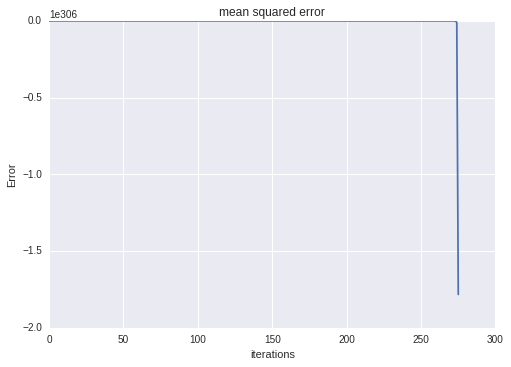

In [20]:
plt.plot(np.mean(np.power(st_err,1),1))
plt.title("mean squared error")
plt.xlabel("iterations")
plt.ylabel("Error")

In [18]:
np.mean(np.power(st_err,1),1)

array([[ -5.49827084e-002],
       [  5.57832671e-005],
       [  3.83800434e-002],
       [ -1.09443692e-001],
       [ -3.63042882e-001],
       [ -8.68851926e-001],
       [ -1.71233921e+000],
       [ -5.53835462e+000],
       [ -1.41287566e+001],
       [ -2.93649778e+001],
       [ -5.20824927e+001],
       [ -8.49114847e+001],
       [ -1.27394034e+002],
       [ -1.82521315e+002],
       [ -2.56085767e+002],
       [ -3.46028445e+002],
       [ -4.65221133e+002],
       [ -6.18079275e+002],
       [ -8.14879036e+002],
       [ -1.08040197e+003],
       [ -1.43419206e+003],
       [ -1.91357928e+003],
       [ -2.59134897e+003],
       [ -3.53462579e+003],
       [ -4.88800290e+003],
       [ -6.90687216e+003],
       [ -9.87601840e+003],
       [ -1.44755686e+004],
       [ -2.15561070e+004],
       [ -3.28698251e+004],
       [ -5.10880360e+004],
       [ -8.15176785e+004],
       [ -1.31865400e+005],
       [ -2.18542008e+005],
       [ -3.71045323e+005],
       [ -6.41602177

In [9]:
# store_tmp[0]
np.sum(st_err*2,1).shape

(2000, 1)

In [10]:
# plt.plot(tograph[0,:])
# plt.show()

In [11]:
plt.scatter(np.mean(x,1),tograph[0,:])
plt.xlabel("MNIST number averaged over T steps")
plt.ylabel("Activation mu")
plt.title("Activation vs input")

IndexError: tuple index out of range

In [ ]:
plt.imshow(inp[1,:,:])


In [ ]:
#print('Firing rates:',np.sum(h[0], 1)/t)

In [ ]:
fig, axes = plt.subplots(3,1,figsize = (15, 15), sharex = True)
axes[0].imshow(inp[0], aspect = 'auto', interpolation = 'nearest')
axes[1].imshow(v, aspect = 'auto', interpolation = 'nearest')
im2 = axes[2].imshow(h, aspect = 'auto', interpolation = 'nearest')
axes[0].set_ylabel('voltage')
axes[1].set_ylabel('spike raster')
axes[2].set_ylabel('synaptic input')
axes[2].set_xlabel('time bin')
plt.colorbar(im2, ax = axes[2])

## Causal effect estimation

In [ ]:
U = np.eye(n2)
target = .02*np.ones((n2,1))
target[0] = 0
C_orig = lambda s: np.sum((np.dot(U, s) - target)**2,0)
nsims = 50
beta_rd_c = np.zeros((nC, nsims, nP, n1))
beta_rd_c_linear = np.zeros((nC, nsims, nP, n1))
beta_fd_c = np.zeros((nC, nsims, nP, n1))
beta_fd_c_linear = np.zeros((nC, nsims, nP, n1))

In [ ]:
cvals

In [ ]:
#Compute causal effects
for i,c in enumerate(cvals):
    print("Running %d simulations with c=%s"%(nsims, c))
    params.c = c
    lif.setup(params)
    for j in range(nsims):
        (inp,v, h, u, sh) = lif.simulate(DeltaT)
        cost = C_orig(sh[n1:,:])
        for k,p in enumerate(pvals):
            #a = causaleffect_maxv(u[0:n1,:], cost, DeltaT, p, params)
            #print(a.shape)
            beta_rd_c[i,j,k,:] = causaleffect_maxv(u[0:n1,:], cost, DeltaT, p, params)
            beta_rd_c_linear[i,j,k,:] = causaleffect_maxv_linear(u[0:n1,:], cost, DeltaT, p, params)
        beta_fd_c[i,j,:] = causaleffect_maxv(u[0:n1,:], cost, DeltaT, 1, params)
        beta_fd_c_linear[i,j,:] = causaleffect_maxv_linear(u[0:n1,:], cost, DeltaT, 1, params)

In [ ]:
#Plot the causal effects as a function of p
for u in range(10):
    #u = 1
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    #for i in range(len(cvals)):
    #    #sns.tsplot(data = beta_rd_c[i,:,:,u], ax = ax, ci='sd', time=pvals)#, color='C%d'%i)
    #    sns.tsplot(data = beta_rd_c[i,:,:,u], ax = ax, time=pvals)#, color='C%d'%i)
    #    #ax.plot(pvals, m_beta_rd_c[i,-1,u]*ones(pvals.shape), '-.', color='C%d'%i)
    sns.tsplot(data = beta_rd_c[0,:,:,u], ax = ax, time=pvals, color='red')
    sns.tsplot(data = beta_rd_c[1,:,:,u], ax = ax, time=pvals, color='blue')
    #sns.tsplot(data = beta_rd_c_linear[0,:,:,u], ax = ax, time=pvals, color='red')
    #sns.tsplot(data = beta_rd_c_linear[1,:,:,u], ax = ax, time=pvals, color='blue')
    ax.set_xlabel('window size $p$');
    ax.set_ylabel('average causal effect');
    ax.set_title('Constant RD estimator');
    #ax.plot(pvals, beta_sp_c[0,u]*ones(pvals.shape), color=(0,0,0));
    #ax.set_ylim([3, 7])
    #ax.set_ylim([5.4, 5.9])
    #ax.set_xlim([0, 1])
    ax.set_xscale('log')
    #ax.set_yticks([2, 3, 4, 5, 6])
    sns.despine(trim=True)
    ax.legend(["c = %.2f"%i for i in cvals]);
    #plt.savefig('./fig_2a.pdf')

## A. Dependence on $N$ and $c$

In [ ]:
nsims = 5
cvals = np.array([0.01, 0.25, 0.5, 0.75, 0.99])
#cvals = np.array([0.01, 0.25, 0.5])
#Nvals = np.logspace(1, 3, 6, dtype = int)
Nvals = np.logspace(1, 3, 4, dtype = int)

tau_s = 0.020
dt = 0.001
t = 100
sigma = 10
x = 0
p = 0.1
DeltaT = 20

W = np.array([12, 9])

params = ParamsLIF(sigma = sigma)
lif = LIF(params, t = t)
lif.W = W

t_filter = np.linspace(0, 1, 2000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]

#c (correlation between noise inputs)
beta_mse_rd_c = np.zeros((len(cvals), len(Nvals), nsims))
beta_mse_fd_c = np.zeros((len(cvals), len(Nvals), nsims))
beta_mse_bp_c = np.zeros((len(cvals), len(Nvals), nsims))

beta_mse_rd_c_linear = np.zeros((len(cvals), len(Nvals), nsims))
beta_mse_fd_c_linear = np.zeros((len(cvals), len(Nvals), nsims))

In [ ]:
#beta_sp_c = np.zeros((len(cvals), params.n))

target = 0.1
W = 10*np.ones(int(Nvals[-1]))
#W = np.random.randn(int(Nvals[-1]))*5
V = np.random.randn(int(Nvals[-1]))*5

cost = lambda s,a: (np.dot(a[0:len(s)], s) - len(s)*target)**2

#Cost function
#B1 = 1
#B2 = 2
#x = .01
#y = 0.1
#z = 0

#cost = lambda s1, s2: (B1*s1-x)**2 + (z+B2*s2 - B2*(B1*s1-y)**2)**2

In [ ]:
params.c = 0.99
params.n = 10
lif.setup(params)
lif.W = W[0:10]
(v, h, _, _, u) = lif.simulate(DeltaT)

In [ ]:
h.shape
n_units = 10
s = np.zeros(h.shape)
for l in range(10):
    s[l,:] = np.convolve(h[l,:], exp_filter)[0:h.shape[1]]
cost_s = cost(s,V[0:n_units])